In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
print("hello")

hello


In [12]:
import sys
import os
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(".", "src")))

from audio_processing import audio_import

In [14]:
loader = audio_import.AudioLoader()

print(loader.directory)
#ensure files can be viewed
os.listdir(loader.directory)

..\audio_files


['ex1.wav',
 'ex2.wav',
 'ex3.wav',
 'ex4.wav',
 'ex5.wav',
 'ex5_distorted.wav',
 'ex6.wav',
 'ex6_distorted.wav']

In [15]:
loader = audio_import.AudioLoader()

data = loader.load_batch(['ex1.wav', 'ex2.wav', 'ex3.wav'])

for name, info in data.items():
    print(f"{name}: {info['data'].shape}, {info['samplerate']} Hz")

Loading: ..\audio_files\ex1.wav
Loading: ..\audio_files\ex2.wav
Loading: ..\audio_files\ex3.wav
ex1.wav: (161847,), 22050 Hz
ex2.wav: (131409,), 22050 Hz
ex3.wav: (155673,), 22050 Hz
Loading: ..\audio_files\ex2.wav
Loading: ..\audio_files\ex3.wav
ex1.wav: (161847,), 22050 Hz
ex2.wav: (131409,), 22050 Hz
ex3.wav: (155673,), 22050 Hz


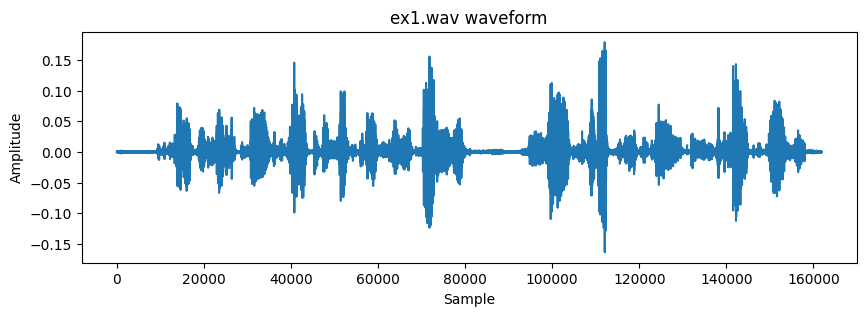

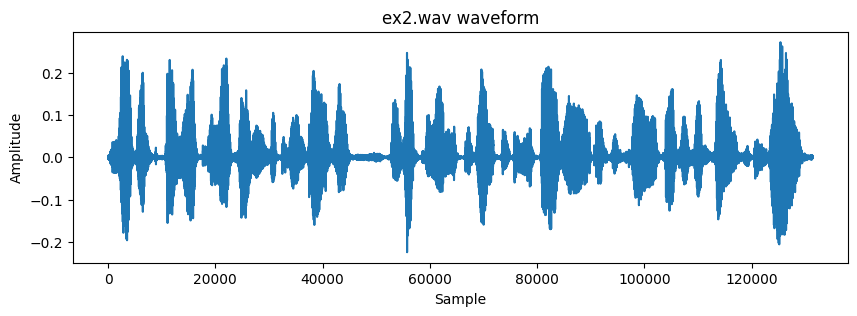

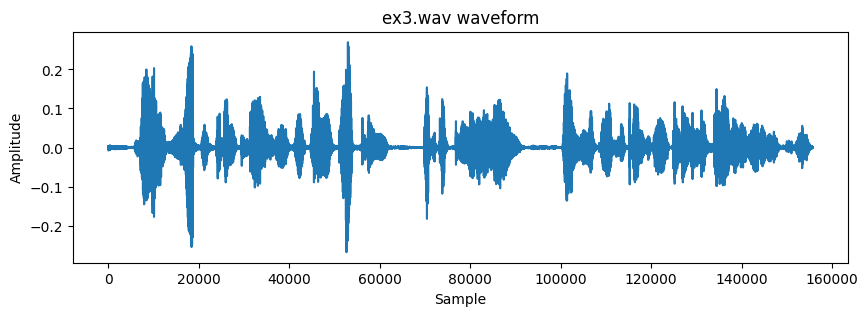

In [13]:
for name, info in data.items():
    plt.figure(figsize=(10, 3))
    plt.plot(info['data'])
    plt.title(f"{name} waveform")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.show()

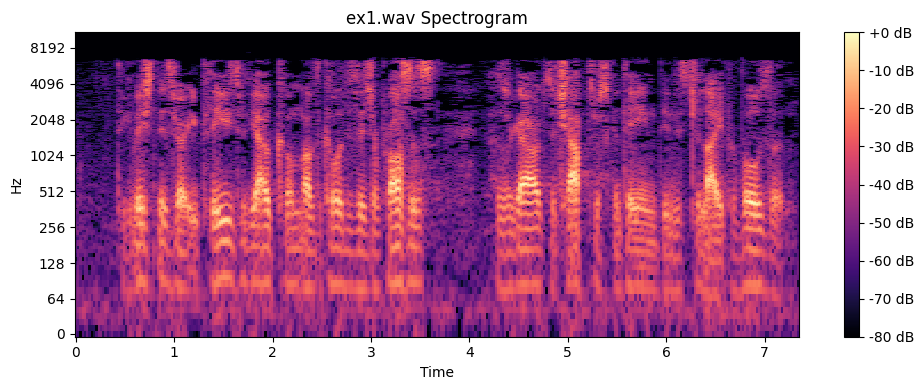

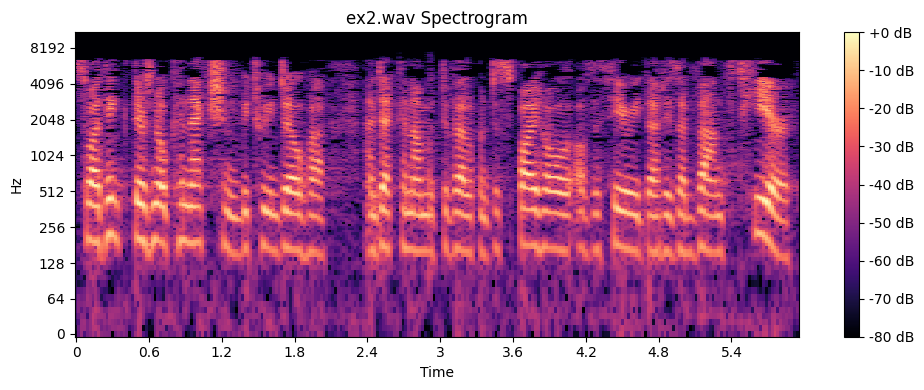

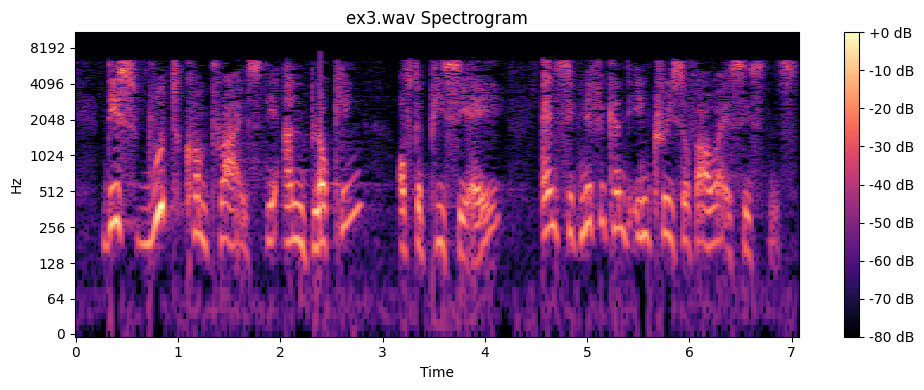

In [14]:
import numpy as np
import librosa.display

for name, info in data.items():
    plt.figure(figsize=(10, 4))
    # Compute the spectrogram
    S = np.abs(librosa.stft(info['data']))
    S_db = librosa.amplitude_to_db(S, ref=np.max)
    librosa.display.specshow(S_db, sr=info['samplerate'], x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"{name} Spectrogram")
    plt.tight_layout()
    plt.show()

In [6]:
# 
from audio_processing import distortion_detection

for name, info in data.items():
    thd = distortion_detection.thd_ratio(info['data'])
    detect_clipping = distortion_detection.detect_clipping(info['data'])
    print(f"{name}: THD = {thd}, Clipping = {detect_clipping}")


ImportError: cannot import name 'distortion_detection' from 'audio_processing' (c:\Users\Aaron\OneDrive\Desktop\School Shit\Capstone\audio-qa-app\.venv\lib\site-packages\audio_processing\__init__.py)

In [ ]:
# test artificial distortion
print(os.listdir(os.path.join("..", "src", "audio_processing")))

from audio_processing.artifact_simulate import ArtifactSim

aSim = ArtifactSim()

aSim.distort_audio('ex5.wav', 'ex5_distorted.wav')

['artifact_simulate.py', 'audio_import.py', 'distortion_detection.py', 'README.md', '__init__.py', '__pycache__']
Loading: .\audio_files\ex1.wav


FileNotFoundError: [WinError 3] The system cannot find the path specified: '.\\audio_files'